In [43]:
pip install --upgrade networkx


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.8 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


Archivo descargado exitosamente
Claves del archivo .mat: dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])


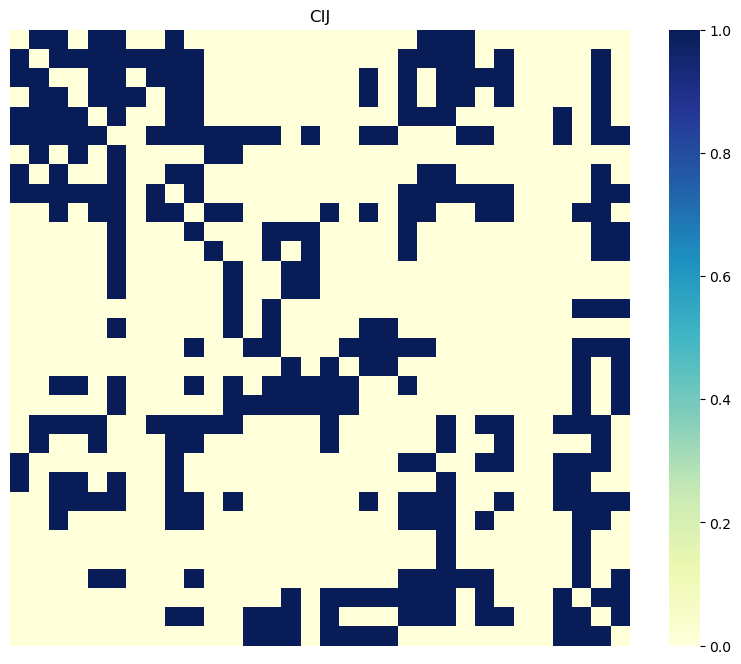

In [45]:
import requests
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/Vaniat25/Neurociencias-2025-1/main/fve32.mat'

response = requests.get(url)

with open('Coactivation_matrix.mat', 'wb') as file:
    file.write(response.content)

print("Archivo descargado exitosamente")

mat_data = scipy.io.loadmat('Coactivation_matrix.mat')

print("Claves del archivo .mat:", mat_data.keys())

coactivation_matrix = mat_data['CIJ']

df = pd.DataFrame(coactivation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap="YlGnBu", annot=False, cbar=True, xticklabels=False, yticklabels=False)
plt.title("CIJ")
plt.show()

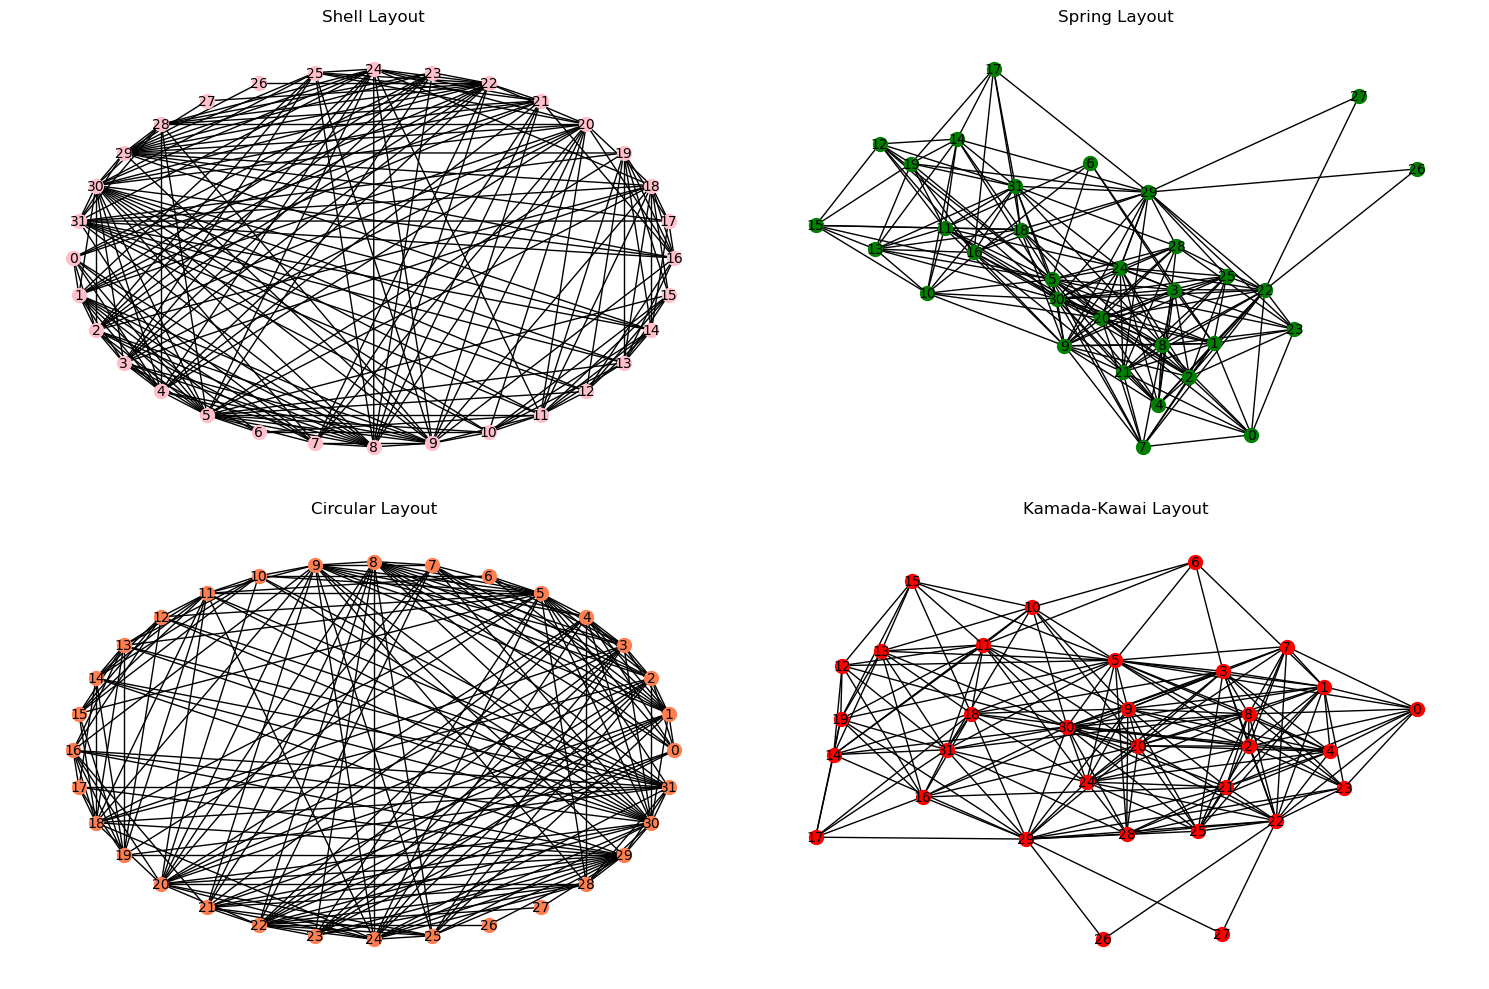

In [49]:
G = nx.from_numpy_array(coactivation_matrix)


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
shell_pos = nx.shell_layout(G)
nx.draw(G, pos=shell_pos, with_labels=True, node_color='pink', node_size=100, font_size=10, font_color='black')
plt.title("Shell Layout")

plt.subplot(2, 2, 2)
spring_pos = nx.spring_layout(G)
nx.draw(G, pos=spring_pos, with_labels=True, node_color='green', node_size=100, font_size=10, font_color='black')
plt.title("Spring Layout")

plt.subplot(2, 2, 3)
circular_pos = nx.circular_layout(G)
nx.draw(G, pos=circular_pos, with_labels=True, node_color='coral', node_size=100, font_size=10, font_color='black')
plt.title("Circular Layout")

plt.subplot(2, 2, 4)
kk_pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=kk_pos, with_labels=True, node_color='red', node_size=100, font_size=10, font_color='black')
plt.title("Kamada-Kawai Layout")

plt.tight_layout()
plt.show()

In [51]:
grado = dict(G.degree())
nodo_max_conexiones = max(grado, key=grado.get)

print(f"El nodo con más conexiones es: {nodo_max_conexiones}")
print(f"Con un total de {grado[nodo_max_conexiones]} conexiones.")

El nodo con más conexiones es: 30
Con un total de 22 conexiones.


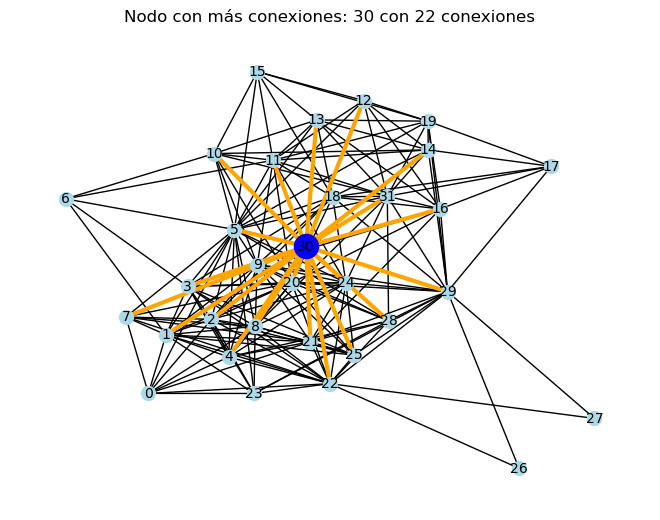

In [55]:
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10, font_color='black')
aristas_destacadas = [(nodo_max_conexiones, vecino) for vecino in G.neighbors(nodo_max_conexiones)]
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_max_conexiones], node_color='blue', node_size=300)
nx.draw_networkx_edges(G, pos, edgelist=aristas_destacadas, edge_color='orange', width=3)
plt.title(f"Nodo con más conexiones: {nodo_max_conexiones} con {grado[nodo_max_conexiones]} conexiones")
plt.show()